Pré-processamento realizado em Processing.ipynb

# Bibliotecas

In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
from scipy import signal
import ml_time_series as mls
import timeit
from datetime import datetime
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import utils

%matplotlib notebook

In [2]:
def Stacker(files_,t):
    
    #Lê dados do arquivo e remove janela
    Xc = np.load('DB_INTENC/preproc/'+files_[0]+'.npy')
    Xc = Xc[:-49]
    
    #Aplica Hstack nos dados
    for j in range(1,len(files_)):
        Xci = np.load('DB_INTENC/preproc/'+files_[j]+'.npy')
        Xc = np.hstack((Xc.reshape(Xc.shape),Xci.reshape(Xci.shape)))
        
    #Labeling the PKS level    
    #C = (np.ones(len(Xc))*l).reshape((len(Xc),1))
    #Xc = np.hstack((Xc.reshape(Xc.shape),C.reshape((len(Xc),1))))    
    
    # Salving in file on the folder <DB_INTENC/preproc/labeled>
    np.save('./DB_INTENC/preproc/labeled/'+t+'_hs', Xc, allow_pickle=False)
    DATA_hs.append(t+'_hs.npy')

In [3]:
#Carregando arquivos

files_ = [['p1_std', 'p1_rms', 'p1_filt'],['p2_std', 'p2_rms', 'p2_filt'],['p3_std', 'p3_rms', 'p3_filt'],
          ['p5_std', 'p5_rms', 'p5_filt'],['c1_std', 'c1_rms', 'c1_filt'],['c3_std', 'c3_rms', 'c3_filt'],
          ['p4_std', 'p4_rms', 'p4_filt'],['p6_std', 'p6_rms', 'p6_filt']]
DATA_hs = []

files_ = [['p4_std', 'p4_rms', 'p4_filt']]
DATA_hs = []

#Grupo de validação
Stacker(files_[0],files_[0][0][:2])

In [4]:
files_[0],files_[0][0][:2]

(['p1_std', 'p1_rms', 'p1_filt'], 'p1')

In [5]:
#Grupo total
for i in range(len(files_)):
    Stacker(files_[i],files_[i][0][:2])

In [6]:
DATA_hs

['p1_hs.npy',
 'p2_hs.npy',
 'p3_hs.npy',
 'p5_hs.npy',
 'c1_hs.npy',
 'c3_hs.npy',
 'p4_hs.npy',
 'p6_hs.npy']

In [7]:
Xc = np.load('DB_INTENC/preproc/labeled/p1_hs.npy')

In [8]:
dfn = pd.DataFrame(data=Xc)
dfn.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.079685,0.009403,-0.013066,-0.004118,44.537192,7.559818,18.959109,25.976221,0.045622,-0.071708,0.928207,0.316825
1,-0.021022,0.003217,-0.013066,0.021096,44.625654,7.583042,19.512969,25.987871,-0.653900,-0.028405,1.233691,0.323795
2,0.078706,0.023837,-0.013066,0.042108,44.652662,7.607774,20.306241,26.098226,-1.344409,-0.094986,1.645009,0.363447
3,0.078706,0.001155,-0.001691,0.050512,44.692366,7.280775,21.180114,26.114275,-1.876668,-0.237642,2.238290,0.454788
4,0.131503,0.007341,-0.009275,0.012691,45.297386,7.296239,22.324117,26.340057,-2.066876,-0.336827,3.042093,0.596534


In [9]:
Xc.shape

(53951, 12)

In [10]:
def proccess_data(x,DATA,NUM_SAMPLES,LABEL):
    
    Xc = np.load("DB_INTENC/preproc/labeled/"+x)
    print '\nXc initial shape ', Xc.shape
    
    #Principal component analysis
    pca = PCA(n_components=3)
    pca.fit(Xc)
    Xc = pca.transform(Xc)
    print pca.explained_variance_ratio_
    
    print 'Xc PCA shape ', Xc.shape
    
    #Create temporal serie
    #Xc = mls.generate_envelope(Xc, NUM_SAMPLES)
    #print 'Xc temporal-serie shape ', Xc.shape
    
    #Labeling the PKS level    
    C = (np.ones(len(Xc))*LABEL).reshape((len(Xc),1))
    Xc = np.hstack((Xc.reshape(Xc.shape),C.reshape((len(Xc),1)))) 
    print 'Xc labeled shape ', Xc.shape
    
    # Salving in file on the folder <DB_INTENC/preproc/labeled>
    np.save('./DB_INTENC/preproc/labeled/'+x[:2]+'_tsl', Xc, allow_pickle=False)
    print '\n'+x[:2]+'_tsl'
    
    DATA.append(x[:2]+'_tsl.npy')

In [11]:
DATA_hs

['p1_hs.npy',
 'p2_hs.npy',
 'p3_hs.npy',
 'p5_hs.npy',
 'c1_hs.npy',
 'c3_hs.npy',
 'p4_hs.npy',
 'p6_hs.npy']

---

#Validação
start = timeit.default_timer()

NUM_SAMPLES = 500
l = [1]
DATA = []

for x, y in zip(DATA_hs, l):
    proccess_data(x,DATA,NUM_SAMPLES,y)
    
stop = timeit.default_timer()
ti = stop - start 
print ('Tempo total para o envelopamento: %.2f min' % (ti/60))

DATA

Xc = np.load('DB_INTENC/preproc/labeled/p4_hs.npy_tsl.npy')
dfn = pd.DataFrame(data=Xc)
dfn.head()

---

In [12]:
l = [2, 15, 4, 1, 0, 0, 15, 3]
for x, y in zip(DATA_hs, l):
    print x[:2],y

p1 2
p2 15
p3 4
p5 1
c1 0
c3 0
p4 15
p6 3


In [13]:
#Grupo total
start = timeit.default_timer()

NUM_SAMPLES = 500
l = [2, 15, 4, 1, 0, 0, 15, 3]
DATA = []

for x, y in zip(DATA_hs, l):
    proccess_data(x,DATA,NUM_SAMPLES,y)
    
stop = timeit.default_timer()
ti = stop - start 
print ('Tempo total para o envelopamento: %.2f min' % (ti/60))


Xc initial shape  (53951, 12)
[ 0.61593794  0.29817543  0.02675621]
Xc PCA shape  (53951, 3)
Xc labeled shape  (53951, 4)

p1_tsl

Xc initial shape  (25951, 12)
[ 0.74124299  0.17419237  0.0367697 ]
Xc PCA shape  (25951, 3)
Xc labeled shape  (25951, 4)

p2_tsl

Xc initial shape  (61951, 12)
[ 0.71992864  0.18989168  0.06194009]
Xc PCA shape  (61951, 3)
Xc labeled shape  (61951, 4)

p3_tsl

Xc initial shape  (23951, 12)
[ 0.64202733  0.25305677  0.08240487]
Xc PCA shape  (23951, 3)
Xc labeled shape  (23951, 4)

p5_tsl

Xc initial shape  (17951, 12)
[ 0.64981489  0.26427588  0.06478059]
Xc PCA shape  (17951, 3)
Xc labeled shape  (17951, 4)

c1_tsl

Xc initial shape  (19951, 12)
[ 0.75157388  0.12123081  0.05738713]
Xc PCA shape  (19951, 3)
Xc labeled shape  (19951, 4)

c3_tsl

Xc initial shape  (29951, 12)
[ 0.79051812  0.12226498  0.03525331]
Xc PCA shape  (29951, 3)
Xc labeled shape  (29951, 4)

p4_tsl

Xc initial shape  (29951, 12)
[ 0.78152923  0.15550433  0.03389345]
Xc PCA shape  

#Não foram incluidas as amostras p4 e c3, serão utilizadas para validação!

In [14]:
DATA[1:-2]

['p2_tsl.npy', 'p3_tsl.npy', 'p5_tsl.npy', 'c1_tsl.npy', 'c3_tsl.npy']

---

## Shape data

In [15]:
Xc = np.load("DB_INTENC/preproc/labeled/"+DATA[0])
for i in DATA[1:-2]:
    Xc = np.vstack((Xc,np.load('DB_INTENC/preproc/labeled/'+i))) 

### Split tipo 1

#Dividindo os dados em sets de treino, test e validação
dfn = pd.DataFrame(data=Xc)
train, validate, test = np.split(dfn.sample(frac=1), [int(.6*len(dfn)), int(.8*len(dfn))])

np.save('./DB_INTENC/preproc/labeled/train', train, allow_pickle=False)
np.save('./DB_INTENC/preproc/labeled/validate', validate, allow_pickle=False)
np.save('./DB_INTENC/preproc/labeled/test', test, allow_pickle=False)

Xc_train = np.load("DB_INTENC/preproc/labeled/train.npy")

X_train = Xc_train[:,0:(Xc_train.shape[1]-1)]

yz = Xc_train[:,[(Xc_train.shape[1]-1)]]
y_train = np.array([])
for i in range(len(yz)):
    y_train = np.hstack((y_train,yz[i]))
    
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)

X_train.shape, y_train.shape

#Xc_validate = np.load("DB_INTENC/preproc/labeled/validate.npy")
Xc_validate = Xc

X_validate = Xc_validate[:,0:(Xc_validate.shape[1]-1)]

yz = Xc_validate[:,[(Xc_validate.shape[1]-1)]]
y_validate = np.array([])
for i in range(len(yz)):
    y_validate = np.hstack((y_validate,yz[i]))
    
#lab_enc = preprocessing.LabelEncoder()
#y_validate = lab_enc.fit_transform(y_validate)

X_validate.shape, y_validate.shape

Xc_test= np.load("DB_INTENC/preproc/labeled/validate.npy")

X_test = Xc_test[:,0:(Xc_test.shape[1]-1)]

yz = Xc_test[:,[(Xc_test.shape[1]-1)]]
y_test = np.array([])
for i in range(len(yz)):
    y_test = np.hstack((y_test,yz[i]))
    
lab_enc = preprocessing.LabelEncoder()
y_test = lab_enc.fit_transform(y_test)

X_test.shape, y_test.shape

### Split tipo 2

In [16]:
#Separando set de dados X, e set de labels y - Validação DATA[5] e DATA[6]
Xc = np.load("DB_INTENC/preproc/labeled/"+DATA[5])
    
X_validate = Xc[:,0:(Xc.shape[1]-1)]

yz = Xc[:,[(Xc.shape[1]-1)]]
y_validate = np.array([])
for i in range(len(yz)):
    y_validate = np.hstack((y_validate,yz[i]))
    
X_validate.shape, y_validate.shape

((19951, 3), (19951,))

In [17]:
#Separando set de dados X, e set de labels y - Treino e Teste
Xc = np.load("DB_INTENC/preproc/labeled/"+DATA[0])
#for i in DATA[1:-2]:
for i in DATA[1:]:
    Xc = np.vstack((Xc,np.load('DB_INTENC/preproc/labeled/'+i))) 
    
X = Xc[:,0:(Xc.shape[1]-1)]

yz = Xc[:,[(Xc.shape[1]-1)]]
y = np.array([])
for i in range(len(yz)):
    y = np.hstack((y,yz[i]))
    
X.shape, y.shape

((263608, 3), (263608,))

In [18]:
np.unique(y)

array([  0.,   1.,   2.,   3.,   4.,  15.])

In [19]:
#Dividindo os dados em sets de treino e test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_test, X_validate, y_test, y_validate = train_test_split(X, y, test_size=0.5, random_state=1)

In [20]:
#Aplica normalizador P.S.: Verificar necessidade pois os dados já foram normalizados anteriormente
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_validate_std = sc.transform(X_validate)

print X_train_std.shape, X_test_std.shape, X_validate_std.shape, y_train.shape, y_test.shape, y_validate.shape

(184525, 3) (131804, 3) (131804, 3) (184525,) (131804,) (131804,)


In [21]:
X_validate_std = sc.transform(X_validate)

X_validate_std.shape, y_validate.shape

((131804, 3), (131804,))

---

## Classifiers

### Random Forest

In [22]:
#Training and test
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, n_jobs = 4)

print 'Training time'
%time rfc = rfc.fit(X_train_std, y_train)

print''

print 'Predict time'
%time y_pred = rfc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score
print ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

Training time
CPU times: user 59.5 s, sys: 1.2 s, total: 1min
Wall time: 17.2 s

Predict time
CPU times: user 9.07 s, sys: 132 ms, total: 9.2 s
Wall time: 2.75 s

ClassifyRF accuracy:---------->100.00 %


#### Resultado anterior
Training time
CPU times: user 48.9 s, sys: 488 ms, total: 49.4 s
Wall time: 12.9 s

Predict time
CPU times: user 6.69 s, sys: 536 ms, total: 7.22 s
Wall time: 2.03 s

ClassifyRF accuracy:---------->100.00 %

#Salva a rede treinada para um arquivo
joblib.dump(rfc, 'DB_INTENC/preproc/labeled/rfc_split2.pkl') 

rfc = joblib.load('DB_INTENC/preproc/labeled/rfc.pkl')

In [23]:
#Validation
print 'Predict time'
%time y_pred = rfc.predict(X_validate)

print''

from sklearn.metrics import accuracy_score

result = ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_pred, y_validate)*100))

print result

Predict time
CPU times: user 2.33 s, sys: 248 ms, total: 2.58 s
Wall time: 949 ms

ClassifyRF accuracy:---------->23.94 %


#### Resultado anterior
Predict time
CPU times: user 1.73 s, sys: 220 ms, total: 1.95 s
Wall time: 707 ms

ClassifyRF accuracy:---------->27.10 %


In [24]:
#Validation
print 'Predict time'
%time y_pred = rfc.predict(X_validate_std)

print''

from sklearn.metrics import accuracy_score

result = ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_pred, y_validate)*100))

print result

Predict time
CPU times: user 9.02 s, sys: 132 ms, total: 9.15 s
Wall time: 2.66 s

ClassifyRF accuracy:---------->83.04 %


#### Resultado anterior
Predict time
CPU times: user 6.7 s, sys: 372 ms, total: 7.07 s
Wall time: 2.05 s

ClassifyRF accuracy:---------->85.97 %


In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, y_pred)
confusion_matrix = confusion_matrix.astype('float')

In [119]:
confusion_matrix

array([[ 17307.,     89.,    670.,    256.,    124.,    295.],
       [   225.,   9523.,    741.,    292.,    473.,    758.],
       [  1029.,    290.,  22331.,   1136.,    917.,   1336.],
       [   592.,    281.,   1978.,  10650.,    471.,   1132.],
       [   330.,    395.,   1139.,    465.,  27510.,   1209.],
       [   645.,    586.,   2179.,   1078.,   1239.,  22133.]])

In [96]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [111]:
TPR*100 # Sensitivity

array([ 92.35,  79.28,  82.59,  70.51,  88.6 ,  79.44])

In [114]:
TNR*100 # Specificity

array([ 97.5 ,  98.63,  93.6 ,  97.23,  96.8 ,  95.45])

In [115]:
PPV*100 # Precision

array([ 85.98,  85.3 ,  76.9 ,  76.75,  89.51,  82.39])

In [116]:
ACC*100 # Accuracy

array([ 96.77,  96.87,  91.34,  94.17,  94.87,  92.07])

In [117]:
sum(ACC)/6*100

94.347667749081978

## Confusion Matrix

<IPython.core.display.Javascript object>


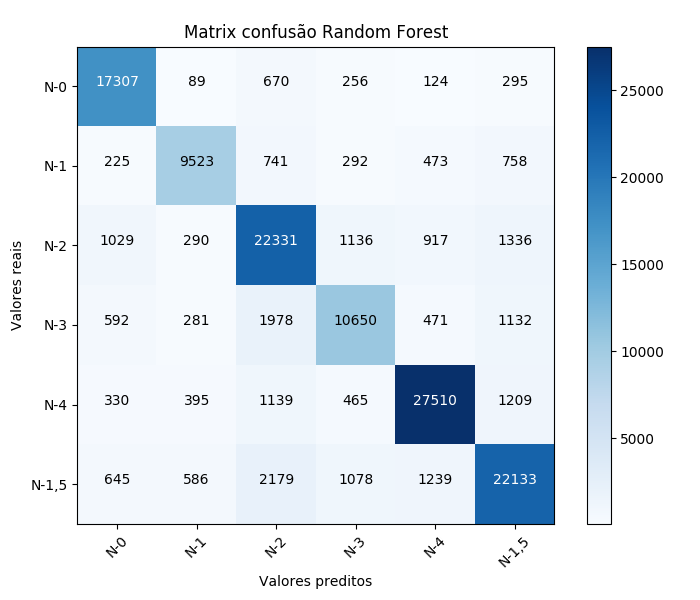

<IPython.core.display.Javascript object>


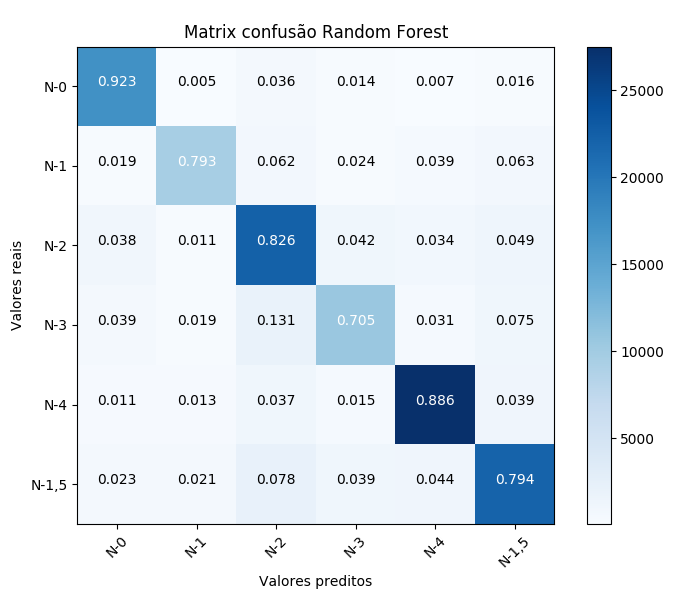

In [87]:
# encoding=utf8  
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib notebook
class_names = np.array(['N-0', 'N-1', 'N-2', 'N-3', 'N-4', 'N-1,5'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix confusão Random Forest')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix confusão Random Forest')
fig_name = 'cm_RF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

---

## Support Vector Machine RBF

In [121]:
from sklearn import svm, datasets

print 'Processing time SVM'
%time svm = svm.SVC(kernel='rbf', gamma=0.2, C=6, decision_function_shape='ovr').fit(X_train_std, y_train)

print ''
print 'Predict time'  
%time y_pred = svm.predict(X_test_std)
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

print 'Predict time'  
%time y_pred = svm.predict(X_test_std)
from sklearn.metrics import accuracy_score
print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

In [123]:
accuracy_score(y_test, y_pred)

0.5417893235410155

In [124]:
print 'Predict time'  
%time y_pred = svm.predict(X_validate_std)
from sklearn.metrics import accuracy_score
print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_validate, y_pred)*100))

In [126]:
(accuracy_score(y_validate, y_pred))

0.54334466328791231

# Confusion Matrix

In [128]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, y_pred)
confusion_matrix = confusion_matrix.astype('float')

In [129]:
confusion_matrix

array([[ 14447.,     22.,   2935.,    168.,    632.,    537.],
       [  1033.,   2526.,   2556.,    196.,   2509.,   3192.],
       [  4239.,    101.,  16525.,   1208.,   2675.,   2291.],
       [  3230.,    235.,   5187.,   2924.,    994.,   2534.],
       [  1098.,    600.,   3701.,    637.,  21684.,   3328.],
       [  2357.,    635.,   6465.,   1152.,   3742.,  13509.]])

In [130]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [131]:
TPR*100 # Sensitivity

array([ 77.09,  21.03,  61.12,  19.36,  69.84,  48.49])

In [132]:
TNR*100 # Specificity

array([ 89.42,  98.67,  80.1 ,  97.12,  89.53,  88.57])

In [133]:
PPV*100 # Precision

array([ 54.72,  61.33,  44.22,  46.52,  67.27,  53.2 ])

In [134]:
ACC*100 # Accuracy

array([ 87.67,  91.59,  76.21,  88.21,  84.89,  80.1 ])

In [135]:
sum(ACC)/6*100

84.778155442930412

<IPython.core.display.Javascript object>


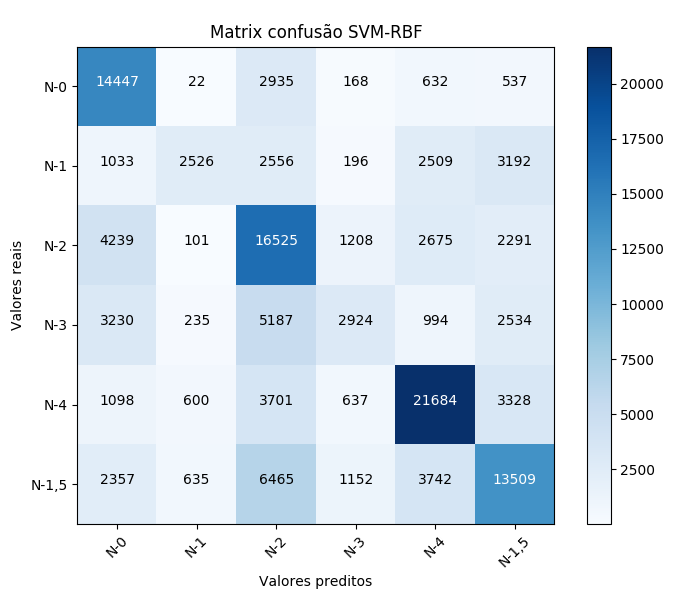

<IPython.core.display.Javascript object>


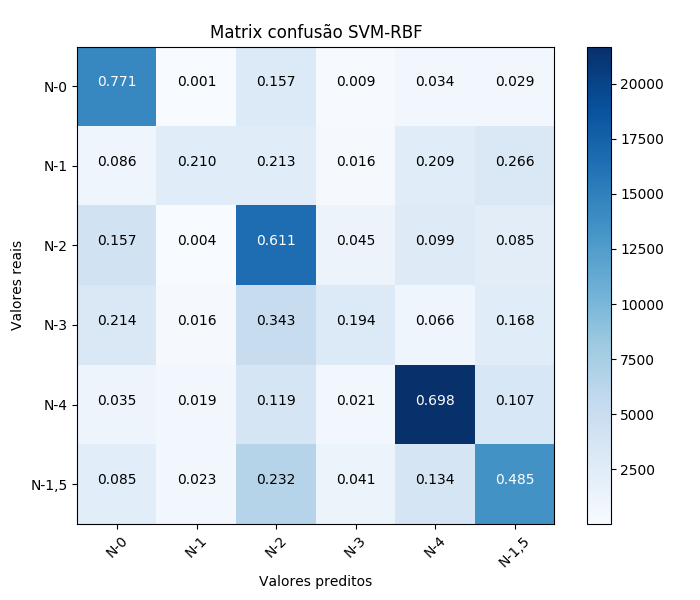

In [127]:
# encoding=utf8  
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib notebook
class_names = np.array(['N-0', 'N-1', 'N-2', 'N-3', 'N-4', 'N-1,5'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix confusão SVM-RBF')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix confusão SVM-RBF')
fig_name = 'cm_SVM-RBF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

## Support Vector Machine Poly

In [136]:
from sklearn import svm, datasets

print 'Processing time Polynomial'
#%time svm = svm.SVC(kernel='poly', degree=2, coef0=4.7, C=48.9, decision_function_shape='ovr').fit(X_train_std, y_train)
%time svm = svm.SVC(kernel='poly', degree=3).fit(X_train_std, y_train)


In [137]:
y_pred = svm.predict(X_test_std)

print 'Predict time'  
%time y_pred = svm.predict(X_test_std)
from sklearn.metrics import accuracy_score
print ('SVM-Polynomial accuracy:--->%.2f %%' % (accuracy_score(y_test, y_pred)*100))
        

In [138]:
accuracy_score(y_test, y_pred)

0.26889168765743071

In [139]:
print 'Predict time'  
%time y_pred = svm.predict(X_validate_std)
from sklearn.metrics import accuracy_score
print ('SVM-Polynomial accuracy:---------->%.2f %%' % (accuracy_score(y_validate, y_pred)*100))

In [140]:
accuracy_score(y_validate, y_pred)

0.26927103881521047

# Confusion Matrix

In [141]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, y_pred)
confusion_matrix = confusion_matrix.astype('float')

In [142]:
confusion_matrix

array([[  0.00e+00,   0.00e+00,   1.78e+04,   0.00e+00,   5.64e+02,
          4.19e+02],
       [  0.00e+00,   2.30e+02,   9.12e+03,   0.00e+00,   1.33e+03,
          1.33e+03],
       [  0.00e+00,   4.00e+00,   2.58e+04,   0.00e+00,   5.93e+02,
          6.58e+02],
       [  0.00e+00,   0.00e+00,   1.41e+04,   0.00e+00,   6.39e+02,
          3.40e+02],
       [  0.00e+00,   2.90e+01,   2.17e+04,   0.00e+00,   7.44e+03,
          1.83e+03],
       [  0.00e+00,   2.70e+01,   2.28e+04,   0.00e+00,   2.95e+03,
          2.04e+03]])

In [143]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [144]:
TPR*100 # Sensitivity

array([  0.  ,   1.91,  95.36,   0.  ,  23.95,   7.32])

In [145]:
TNR*100 # Specificity

array([ 100.  ,   99.95,   18.3 ,  100.  ,   93.97,   95.59])

In [146]:
PPV*100 # Precision

array([   nan,  79.31,  23.15,    nan,  55.03,  30.8 ])

In [147]:
ACC*100 # Accuracy

array([ 85.78,  91.02,  34.11,  88.54,  77.48,  76.93])

In [148]:
sum(ACC)/6*100

75.642367960507016

<IPython.core.display.Javascript object>


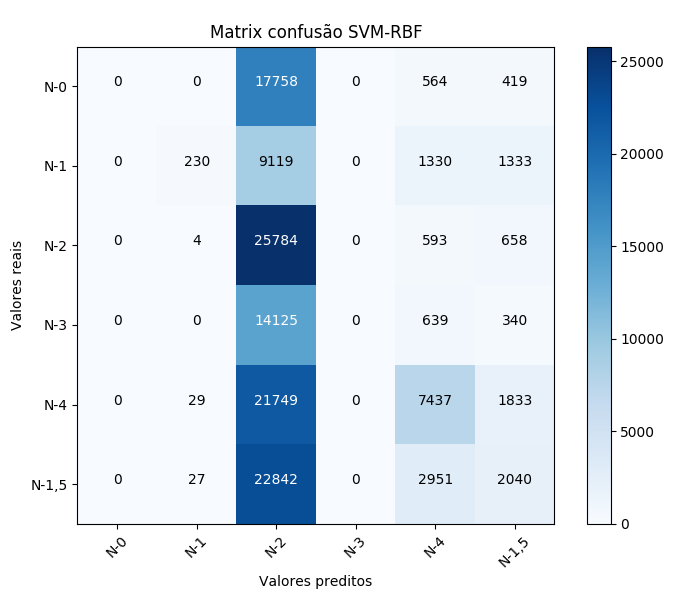

<IPython.core.display.Javascript object>


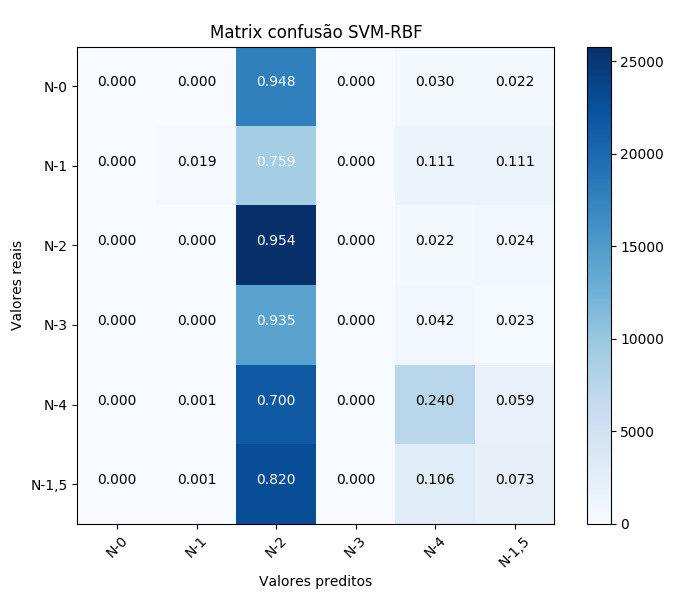

In [149]:
# encoding=utf8  
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib notebook
class_names = np.array(['N-0', 'N-1', 'N-2', 'N-3', 'N-4', 'N-1,5'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix confusão SVM-RBF')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix confusão SVM-RBF')
fig_name = 'cm_SVM-RBF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()